<a href="https://colab.research.google.com/github/KSY1526/myblog/blob/master/%EC%BA%90%EA%B8%80%EC%8A%A4%ED%84%B0%EB%94%94/%EC%8B%9C%EB%AE%AC%EB%A0%88%EC%9D%B4%EC%85%98_%EA%B3%BC%EB%AA%A9_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시뮬레이션 과목 복습

# 코랩에서 R 사용법 by 형락

https://colab.research.google.com/notebook#create=true&language=r

뒷부분에 language=r 만 붙여주면 정상적으로 코랩 R버전이 실행됩니다.

In [13]:
for (i in 1:10){
    print(i)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


# 6.6절 보험금 청구 문제

기존 보험 가입자 n0(사용값 1명), 기존 자본금 a0 (사용값 25000), 기간 365. 보함 가입자는 기간 1당 보험금 C(사용값 11000)을 각각 지불합니다.

이때 자본금이 음이 되지 않을 확률을 모의실험으로 구하는 문제 입니다.

일어날 사건은 보험금청구, 신규고객 가입, 기존계약해지 인데요.

보험금 청구는 도착률 알파(사용값 10)인 포아송 과정, 이때 청구 금액은 지수분포 (사용 람다값 1/1000)을 따릅니다.

포아송 과정이란 사건 발생 시간 분포가 평균 1/알파인 지수분포 입니다.

이 모의실험을 300번 실시해봅니다.

(신규고객 가입, 기존계약 해지는 무시합니다.)

In [14]:
n.sim <- 300 # 모의실험 실행 횟수
n0 <- 1; a0 <- 25000; T <- 365; c <- 11000 # 가입자, 자본금, 기간, 단위기간당 보험금 초기값 부여
alpha <- 10; nu <- 0; mu <- 0 # 알파값, 신규계약과 기존계약 해지는 무시합니다.
generate.Y <- function() rexp(1, rate = 1/1000) # 청구금액 만드는 함수를 생성합니다.
I <- numeric(length = n.sim) # 자본금이 음이되는지 여부를 실험마다 기록하는 변수 입니다.

for (i in 1:n.sim){ # 실험 n.sim(300)번 실행
  t <- 0; a <- a0; n <- n0 # 시점, 자본금, 고객 수 초기값 부여
  total.rate <- nu + n * mu + n * alpha # 사건 발생 람다값 부여. 여기서 유효한 값은 n * alpha(보험금 청구) 입니다.
  tE <- rexp(1, rate = total.rate) # 첫 사건 발생 시간
  repeat{
    if (tE > T) { # 주어진 기간을 초과했을 경우
      I[i] <- 1 # 중간에 중단되지 않고 주어진 기간(365)를 무사히 초과했기 때문에 이번 실험은 성공임을 기록해줍니다.
      break # 반복분 끝내기. 다음 모의 실험이 실행되겠죠.
    }
    if (tE <= T){ # 주어진 기간 내.
      a <- a + n * c * (tE - t) # 보험금 수금. 여기서 tE는 새 사건 발생 시간, t는 과거 사건 발생시간.
      t <- tE # 시점을 새 사건 발생시간에 맞춰줍니다.
      J <- sample(1:3, 1, prob = c(nu, n*mu, n*alpha)) # 이번 사건은 어떤사건인지 정해줍니다. 하지만 여기선 무조건 J는 3이됩니다.
      if (J == 1) n <- n + 1 # 신규고객 가입
      if (J == 2) n <- n - 1 # 기존고객 해지
      if (J == 3){
        Y <- generate.Y(); # 보험금 청구 금액 찾기
        if (Y > a){ # 현재 자본금보다 보험 청구 금액이 많으면 = 자본금이 음수가 됨.
          I[i] <- 0 # 이번 실험은 실패임을 기록
          break # 반복문 끝내기
        }
        else a <- a - Y # 자본금이 음수가 되는 일이 벌어지지 않으면 자본금에서 돈을 쓰면 되겠죠.
      }
      tE <- t + rexp(1,rate=total.rate) # 다음 사건이 일어날 시점을 탐색합니다.
    }
  }
}
mean(I)
cat('자본금이 남아있을 확률 95%신뢰구간 [',mean(I)- 1.96*sd(I)
    /sqrt(n.sim),',',mean(I) + 1.96*sd(I)/sqrt(n.sim), '] \n')

[1] 0.9166667

자본금이 남아있을 확률 95%신뢰구간 [ 0.8853385 , 0.9479949 ] 


자본금이 음수가 되지 않을 확률이 90%정도 됩니다. 신뢰구간도 구할 수 있군요.

강의는 여기까지 가르쳤는데요. 시험문제는 이를 응용하는 문제가 나올 수 있습니다.

제일 쉬운 예시로 고객의 가입과 탈퇴가 포함된 함수를 만드는 문제가 나올수도 있겠습니다.

신규고객 가입을 람다가 1인 포아송 과정으로, 기존 고객 탈퇴를 람다가 0.1인 포아송 과정으로 하겠습니다.

그리고 기존 고객의 초기 수를 10으로 하겠습니다. 

In [15]:
n.sim <- 100 
n0 <- 10; a0 <- 25000; T <- 365; c <- 11000
alpha <- 10; nu <- 1; mu <- 0.1 # 이부분만 바꿔주면 됨
generate.Y <- function() rexp(1, rate = 1/1000)
I <- numeric(length = n.sim) 

for (i in 1:n.sim){ 
  t <- 0; a <- a0; n <- n0 
  total.rate <- nu + n * mu + n * alpha
  tE <- rexp(1, rate = total.rate) 
  repeat{
    if (tE > T) { 
      I[i] <- 1 
      break 
    }
    if (tE <= T){ 
      a <- a + n * c * (tE - t) 
      t <- tE
      J <- sample(1:3, 1, prob = c(nu, n*mu, n*alpha))
      if (J == 1) n <- n + 1
      if (J == 2){
          n <- n - 1
          if (n == 0){ #보험금이 0이된 경우.
            I[i] <- 0
            break
          }
      }
      if (J == 3){
        Y <- generate.Y();
        if (Y > a){ 
          I[i] <- 0
          break 
        }
        else a <- a - Y
      }
      tE <- t + rexp(1,rate=total.rate) 
    }
  }
}
mean(I)
cat('자본금이 남아있을 확률 95%신뢰구간 [',mean(I)- 1.96*sd(I)
    /sqrt(n.sim),',',mean(I) + 1.96*sd(I)/sqrt(n.sim), '] \n')

[1] 0.36

자본금이 남아있을 확률 95%신뢰구간 [ 0.265446 , 0.454554 ] 


이미 세 사건이 일어날걸 가정하고 함수를 다 만들어나서 단순히 nu와 mu값만 넣어주면 됩니다.

다만 보험 가입자가 0명이 될 경우도 있는데 그 경우 또한 실패로 하겠습니다.

확실히 가입자가 늘어나고 탈퇴를 할 수 있는 등 불확실성이 커지니 자본금이 음이 될 확률이 줄어들었습니다.

# 6.8절 주식 옵션 행사 전략

t시점에 주식 가격 S(t) = S(0) * exp(x1 + x2 .. + xt) 이라고 가정합니다. 이때 xi는 iid인 정규분포 변수입니다.

알파 < 평균 + 분산 / 2 (정규분포 평균, 분산) 일때 좋은 전략이 다음과 같이 알려져있습니다.

P(m) = S(N-m) 이라고 할때(만기를 m 앞둔 시점에서의 주가) 다음 조건이 만족하면 옵션을 행사합니다.

1. P(m) > K(옵션권한가격 = 초기가격) 쉽게 얘기해 주식 가격이 초기가격보다 높아야합니다. 당연하죠.
2. P(m) > K + f(i) 을 i = 1,2, .. , m 구간에서 모두 만족해야합니다. f(i)는 식이 복잡해 생략합니다.

또 다른 전략은 끝나는 시점까지 기다렸다가 최종 시점 주식 가격이 K보다 클때만 사는 전략입니다.

두 전략중 어떤 전략이 좋을지 모의실험 1000회를 통해 알아봅시다.

In [20]:
n.sim <- 1000 # 실험횟수
N <- 20; K <- 100; S.zero <- 100; mu <- -0.05 # N : 기간, K, S.zero : 초기 금액(사실 어느값을 써도 비슷함)
sg <- 0.3; alp <- mu + 0.5*sg^2 # mu = -0.05, 시그마 = 0.3
E <- numeric(length = n.sim) 
E2 <- numeric(length = n.sim)

for (i in 1:n.sim){
  S <- S.zero * exp(cumsum(rnorm(N,mu,sg))) # 주식 가격을 구해놓음.
  E2[i] <- max(S[N] - K, 0) # 최종시점 주식 가격이 K보다 크면 그만큼 이득, 아니면 이득 0.
  P <- numeric(length=N+1) # P[0]은 R에서 쓸수 없음. 그래서 길이 자체를 N+1로 해줌.
  P[N+1] <- S.zero #초기값 부여
  m <- N - 1 # m 초기값 부여. 미리 값 1을 뺀 모양새.(위에서 P[N+1] 초기값을 부여했기 때문에)
  flag <- FALSE
  repeat{
    m.plus <- m + 1 # P에서는 m값을 1을 올려서 해줌.
    P[m.plus] <- S[N-m] # 값 넣어줌.
    if(P[m.plus] > K) flag <- TRUE # 1번조건 만족 표현
    if(flag & m > 0){ # 조건1만족 + m이 0아닐때(m이 0일때는 1번조건만 따짐.)
      b <- ((1:m)*mu - log(K/P[m.plus])) / (sg*sqrt(1:m)) 
      op <- P[m.plus] * exp((1:m)*alp)* 
        pnorm(sg*sqrt(1:m) + b) - K * pnorm(b) # 복잡한 식 f(i), 벡터 형태로 되어있음.
      flag <- all(P[m.plus] > K + op) # all은 모든 조건이 true일때만 true를 보내줌.
    }
    if(flag) break else m <- m - 1 # 조건을 모두 만족하면 즉시 옵션 행사.
    if(m < 0) break # 시점이 모두 끝났으면 종료.
  }
  if (flag) E[i] <- P[m.plus] - K else E[i] <- 0 # 조건 만족시 이득본 만큼 기록.
}

cat('전략1 95%신뢰구간 [',mean(E) - 1.96*sd(E)/sqrt(n.sim),
      ',',mean(E) + 1.96*sd(E)/sqrt(n.sim), '] \n')
cat('전략2 95%신뢰구간 [',mean(E2) - 1.96*sd(E2)/sqrt(n.sim),
      ',',mean(E2) + 1.96*sd(E2)/sqrt(n.sim), '] \n')

전략1 95%신뢰구간 [ 35.36105 , 45.49005 ] 
전략2 95%신뢰구간 [ 28.57401 , 44.68403 ] 


여러번 실행을 해보면 전략1과 전략2의 이득 평균이 비슷합니다.

다만 전략2의 신뢰구간이 큰 것은 그만큼 전략2가 불안정한 전략임을 알 수 있습니다.

# 부트스트렙 이론

뽑힌 표본들을 새로운 분포로 가정하여 반복추출(복원추출)을 통해 모수를 추정하는 방법 입니다.

표본들이 실제 분포와 비슷할 수록 모수 추정이 더 정확해집니다.

이 방법의 장점은 중심극한정리 등 분포가정을 하지 않아도 된다는 점입니다.

다음은 부트스트렙 예시로, 표본들이 있을때 Var(s^2)의 추정량을 구하는 문제입니다.

[1] 57.65084

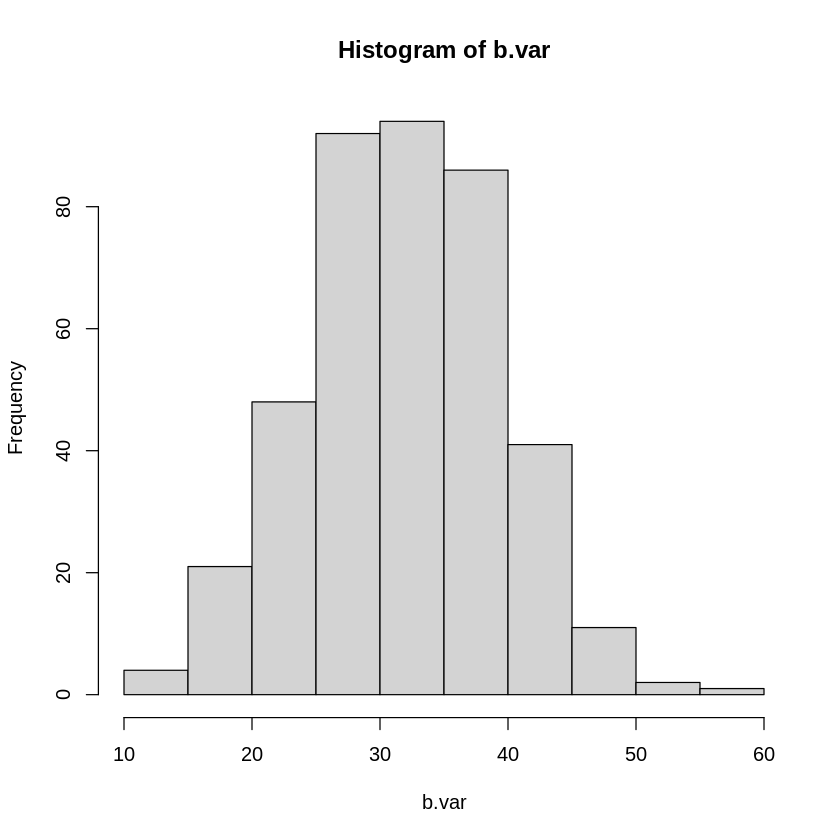

In [21]:
x <- c(5,4,9,6,21,17,11,20,7,10,21,15,13,16,8)
n <- 15
B <- 400 # 400번 실시

f.var <- function(x) var(sample(x, n, rep = T))
b.var <- replicate(B, f.var(x))
var(b.var) # estimate of var(s^2)
hist(b.var)